# **PBI IDX Loan Data Project**

**Project Background**

Kamu diminta untuk membangun model yang dapat memprediksi resiko pembayaran kredit menggunakan dataset yang disediakan oleh company yang terdiri dari data pinjaman yang diterima dan yang ditolak. Selain itu kamu juga perlu mempersiapkan media visual untuk mempresentasikan solusi ke klien. Pastikan media visual yang kamu buat jelas, mudah dibaca, dan komunikatif. Pengerjaan end-to-end solution ini dapat dilakukan di Programming Language pilihanmu dengan tetap mengacu kepada framework/methodology Data Science.

**Objective**:

1. Mengidentifikasi karakteristik klien dalam membayar kembali pinjamannya.
2. Memprediksi pembayaran yang dilakukan klien.

**Actions**:

1. Melakukan data cleaning, dan visualisasi data untuk memperoleh informasi data yang mudah dipahami.
2. Membangun model data dengan algoritma machine learning.
3. Memprediksi resiko pembayaran kredit menggunakan dataset company dengan model machine learning terbaik berdasarkan tingkat prediksi.
4. Memberikan rekomendasi bagi perusahaan untuk mengurangi resiko pembayaran kredit dari hasil prediksi.

### **Import Library**

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [244]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


### **Load Data**

In [175]:
# Load Dataset
loan_data = pd.read_csv("/content/drive/MyDrive/Dataset Data Science/Dataset PBI/loan_data_2007_2014.csv")
loan_data.head() # Menampilkan tabel dataset

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Understanding**

In [176]:
print('This dataset has %d rows dan %d columns.\n' % loan_data.shape)
loan_data.head()

This dataset has 466285 rows dan 75 columns.



,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
print('id',loan_data['id'].nunique())
print('member id',loan_data['member_id'].nunique())

id 466285
member id 466285


**Menghapus data yang tidak penting**

In [178]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'

    # free text
    , 'url'
    , 'desc'

    # all null / constant / others
    , 'zip_code'
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'

    # expert judgment
    , 'sub_grade'
]

In [179]:
data = loan_data.drop(cols_to_drop, axis=1)

### **Define Data Variable**

In [180]:
data.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan *bad loan* (peminjam yang buruk) atau *good loan* (peminjam yang baik) Disini saya menggunakan keterlambatan pembayaran diatas 30 hari dan apabila lebih dari itu maka termasuk *bad_loan*

In [181]:
bad_status = [
    'Charged Off'
    , 'Default'
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [182]:
bad_flag_counts = data['bad_flag'].value_counts(normalize=True)*100

In [183]:
data.drop('loan_status', axis=1, inplace=True)

### **Cleaning, Preprocessing, & Feature Engineering**

**emp_length**

In [184]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [185]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [186]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [187]:
data.drop('emp_length', axis=1, inplace=True)

**term**

In [188]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [189]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [190]:
data.drop('term', axis=1, inplace=True)

**earliest_cr_line**

In [191]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [192]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [193]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64

In [194]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [195]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0


Disitu terdapat nilai negatif, namun nilai negatif tersebut muncul karena fungsi Python salah menginterpretasikan tahun 62 menjadi tahun 2062, dimana seharusnya merupakan tahun 1962. Kemudian saya lakukan hanya mengubah nilai negatif menjadi nilai maximum dari fitur tersebut, dikarenakan nilai negatif merupakan data yang sudah tua serta masuk akal jika mengganti nilai tersebut menjadi nilai terbesar

In [196]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [197]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

**issue_d**

In [198]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [199]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

**last_pymnt_d**

In [200]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [201]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [202]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

**next_pymnt_d**

In [203]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [204]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [205]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

**last_credit_pull_d**

In [206]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [207]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [208]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

## **Exploratory Data Analysis (EDA)**

### **Visualization**

In [209]:
train = loan_data.copy()

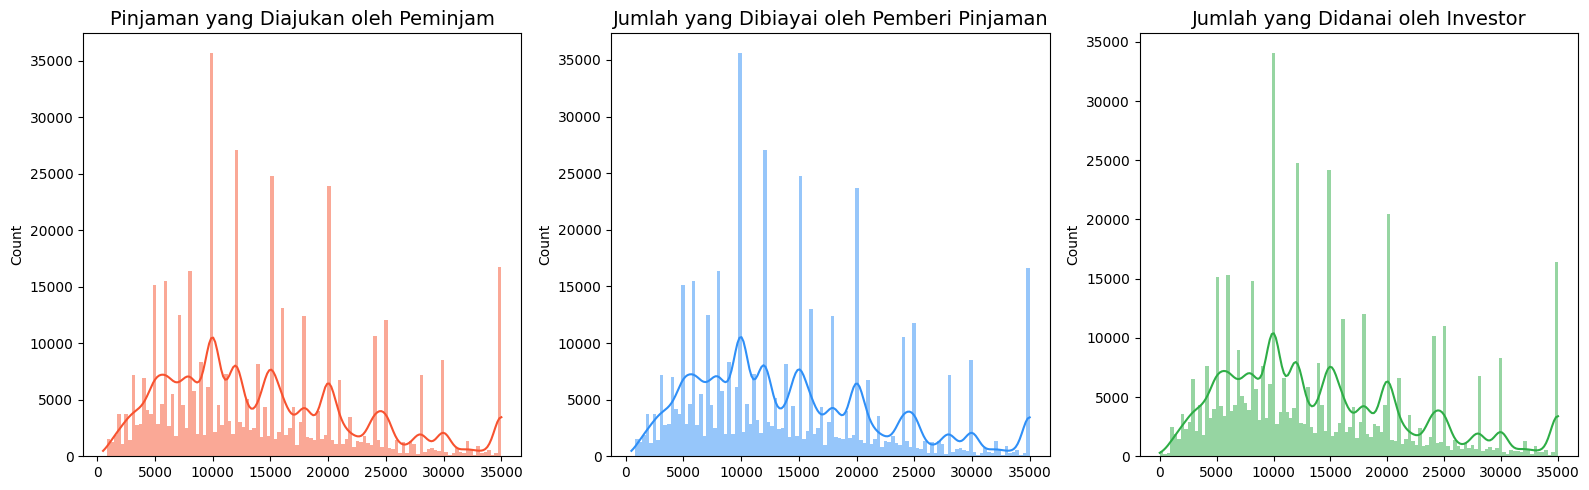

In [210]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount = train["loan_amnt"].values
funded_amount = train["funded_amnt"].values
investor_funds = train["funded_amnt_inv"].values

sns.histplot(loan_amount, ax=ax[0], color="#F7522F", kde=True, linewidth=0)
ax[0].set_title("Pinjaman yang Diajukan oleh Peminjam", fontsize=14)
fig.tight_layout()
sns.histplot(funded_amount, ax=ax[1], color="#2F8FF7", kde=True, linewidth=0)
ax[1].set_title("Jumlah yang Dibiayai oleh Pemberi Pinjaman", fontsize=14)
fig.tight_layout()
sns.histplot(investor_funds, ax=ax[2], color="#2EAD46", kde=True, linewidth=0)
ax[2].set_title("Jumlah yang Didanai oleh Investor", fontsize=14)
fig.tight_layout()

plt.show()

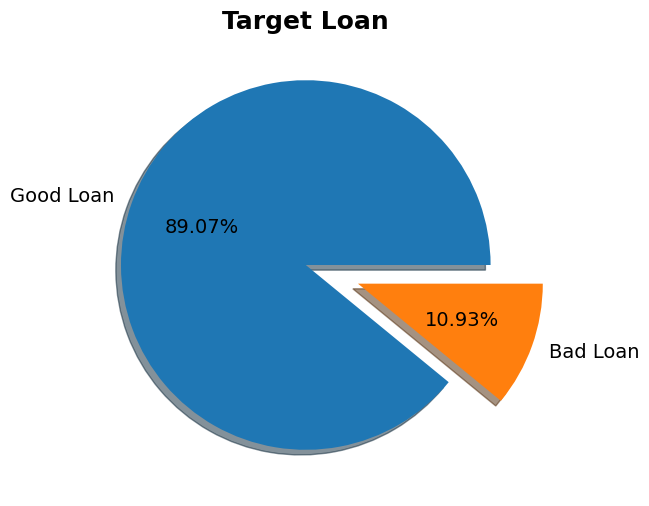

In [211]:
plt.figure(figsize=(6,6))
plt.pie(bad_flag_counts, labels=['Good Loan', 'Bad Loan'], autopct='%.2f%%',
        shadow=True, explode=(0, 0.3), textprops={'fontsize': 14})
plt.title('Target Loan', color='black',fontsize=18,fontweight='semibold', pad=1)
plt.show()

Sekitar 10,93% peminjam tidak dapat mengembalikan uangnya sepenuhnya. Kita harus mengatur untuk meminimalkan tingkat ini sehingga dapat mengurangi kerugian.

<Axes: >

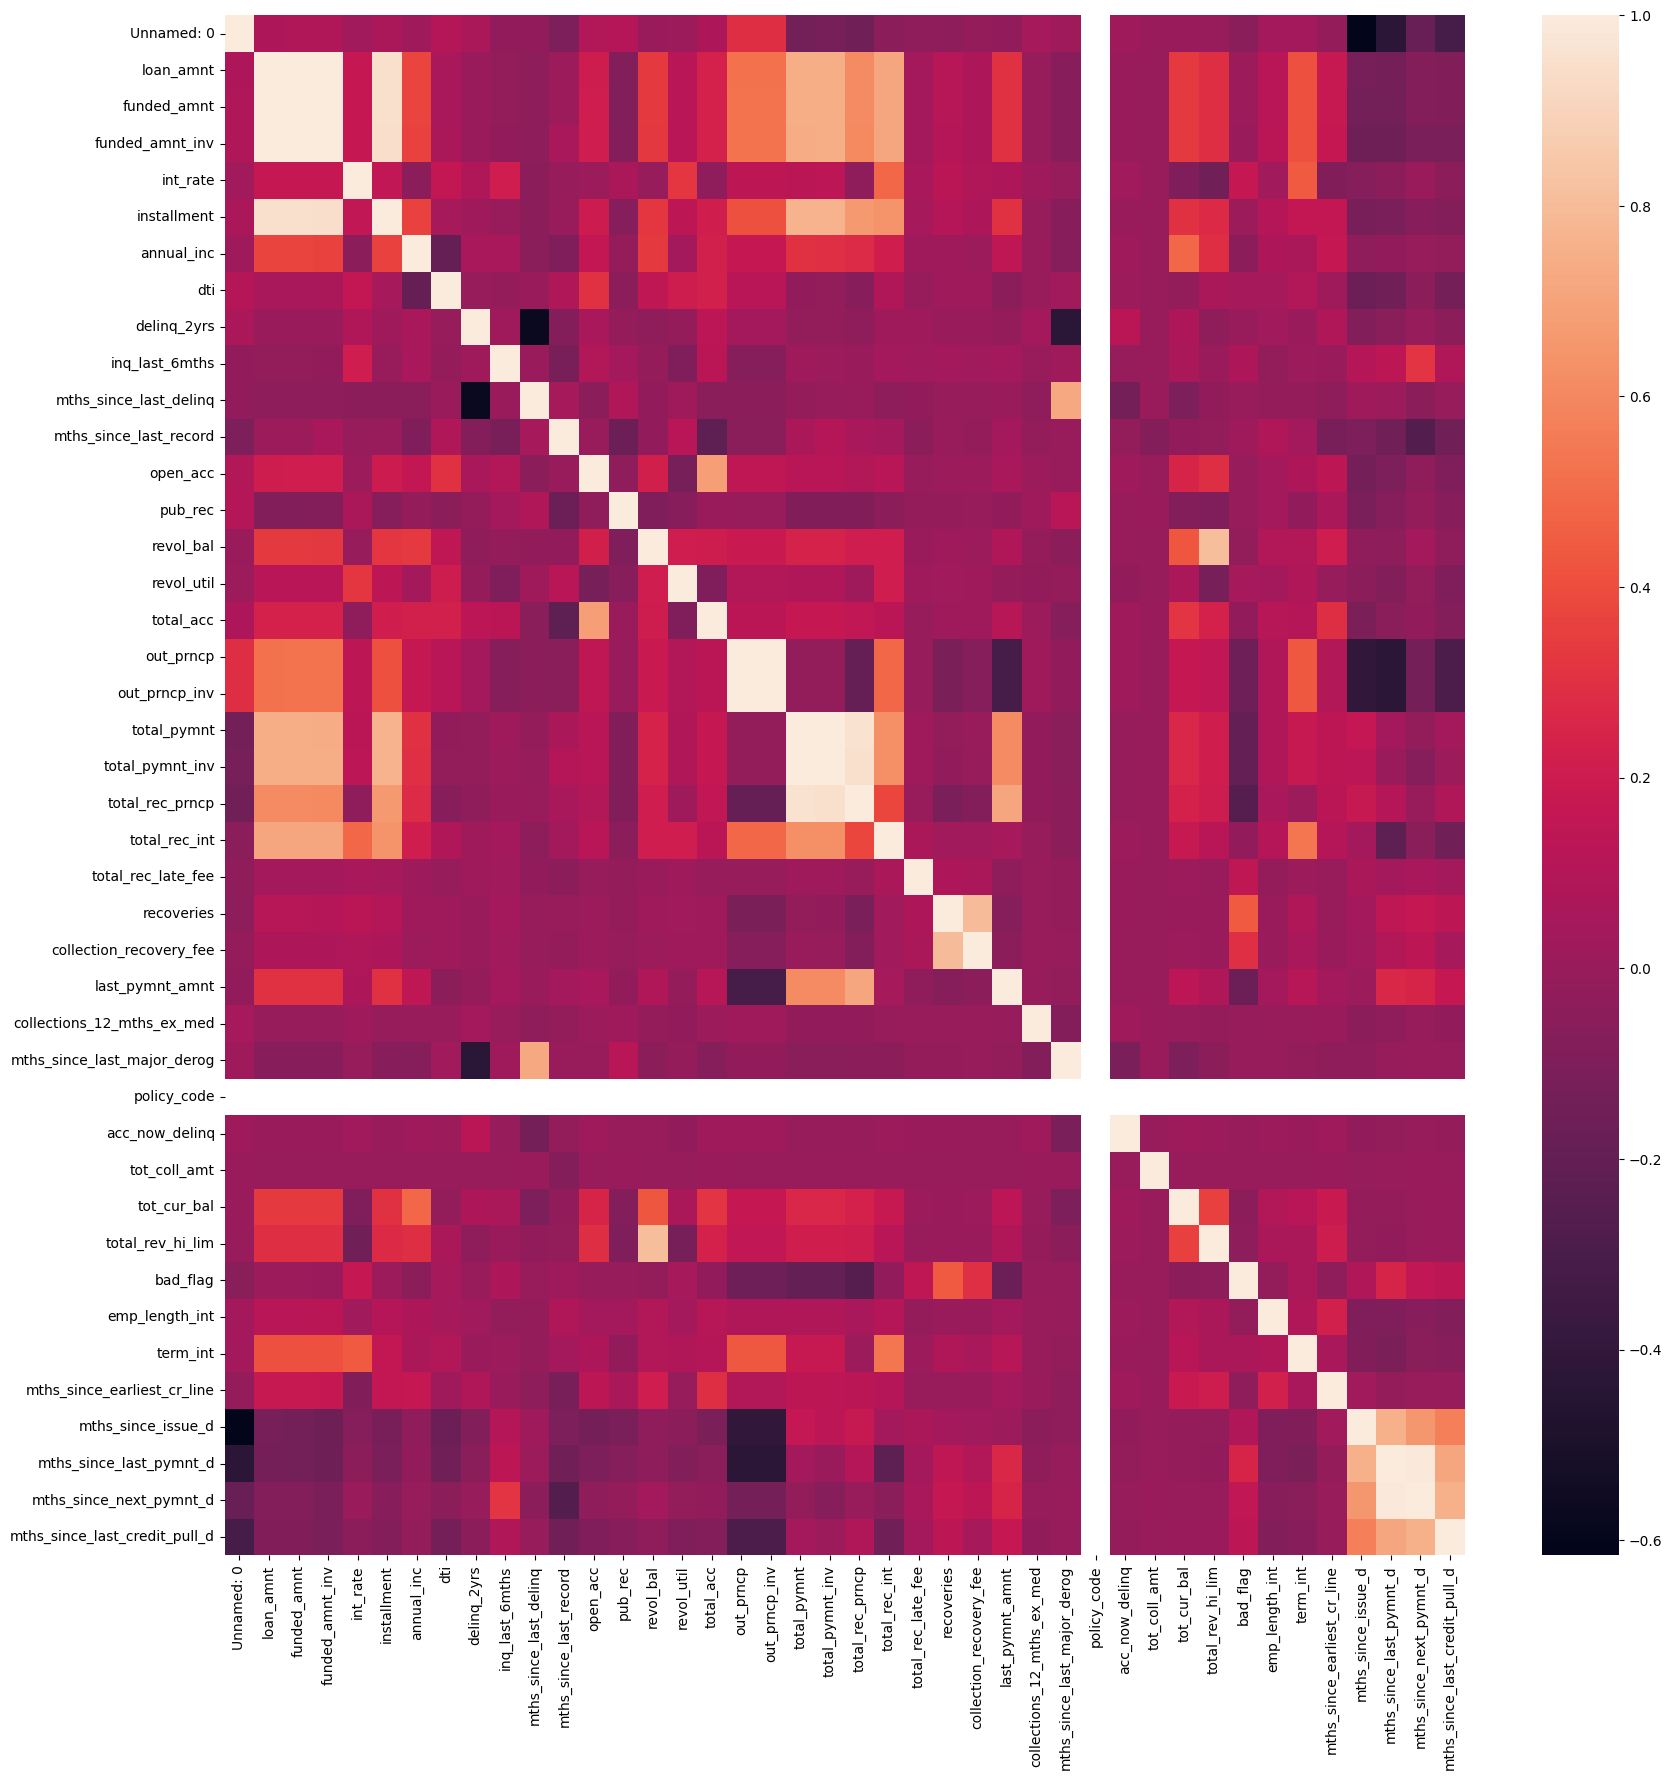

In [212]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

Disini saya memakai 0.7 sebagai nilai patokan umum untuk nilai nilai korelasi tinggi yang tidak pasti

In [213]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [214]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [215]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### **Check Categorial Feature**

In [216]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

In [217]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [218]:
data.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_i

Disitu juga terdapat tipe data selain object juga terdapat fitur yang hanya memiliki satu nilai unik saja, maka akan ikut dibuang juga.

In [219]:
data.drop(['policy_code'], axis=1, inplace=True)

In [220]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

In [221]:
data.drop('pymnt_plan', axis=1, inplace=True)

## **Process Missing Value**

### **Checking Missing Value**

In [222]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_coll_amt                   15.071469
tot_cur_bal                    15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
open_acc                        0.006219
pub_rec                         0.006219
total_acc                       0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
annual_inc                      0.000858
dtype: float64

Kolom dengan missing value diatas 75% dihapus

In [223]:
data.drop('mths_since_last_record', axis=1, inplace=True)

### **Flling Missing Value**

In [224]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

## **Feature Scalling & Transformation**

### **One Hot Encoding**

In [225]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [226]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Standarization**

In [227]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [228]:
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)
std.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,...,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.732047,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.732040,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,...,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.732032,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-1.732025,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,...,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.732017,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,...,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### **Transformed Dataset**

In [229]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

## **Modelling Data**

### **Split & Training Random Forest**

In [230]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values

df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
91,recoveries,0.457109
89,out_prncp,0.232424
90,total_rec_late_fee,0.089173
78,int_rate,0.067713
99,mths_since_issue_d,0.024595
...,...,...
70,addr_state_VT,0.000000
69,addr_state_VA,0.000000
68,addr_state_UT,0.000000
54,addr_state_NH,0.000000


## **Validation**

In [231]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### **AUC**

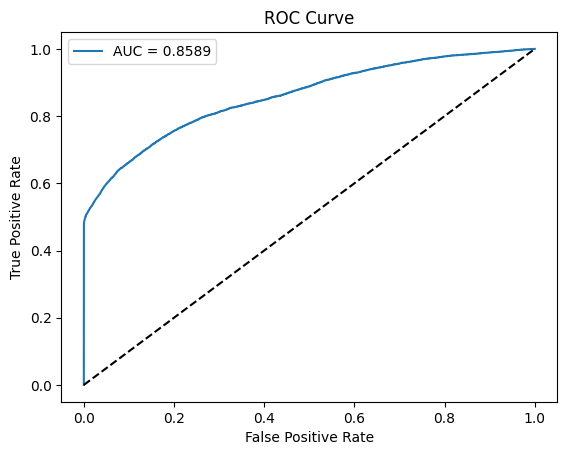

In [232]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

Semakin tinggi AUC, semakin baik performa model dalam membedakan antara perusahaan berisiko tinggi dan rendah. Nilai AUC 0.8589 menunjukkan bahwa model Random Forest mampu memprediksi risiko pembayaran kredit perusahaan dengan baik. Kurva ROC yang semakin dekat ke sudut kiri atas menunjukkan performa model yang semakin baik. Berdasarkan grafik ROC, model Random Forest dengan AUC 0.8589 menunjukkan performa yang baik dalam memprediksi risiko pembayaran kredit perusahaan. Hal ini berarti model dapat membantu perusahaan dalam mengambil keputusan kredit yang lebih akurat dan meminimalkan risiko gagal bayar.

### **KS**

In [233]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [234]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,312396,0,0.040669,1,0,1,0.000011,0.0,0.000012
1,279378,0,0.040860,2,0,2,0.000021,0.0,0.000024
2,308643,0,0.040886,3,0,3,0.000032,0.0,0.000036
3,312143,0,0.040972,4,0,4,0.000043,0.0,0.000048
4,411671,0,0.040992,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5644')

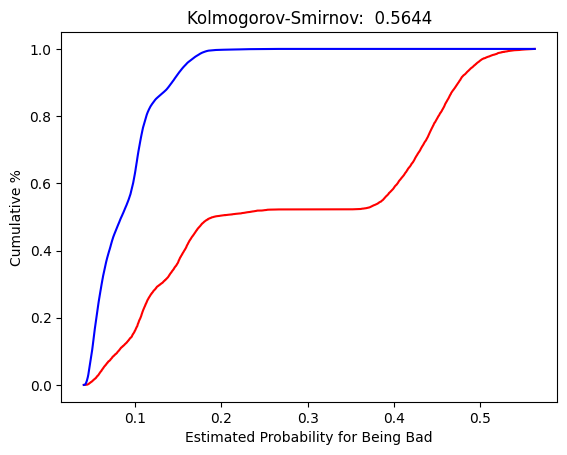

In [235]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Grafik KS membantu perusahaan dalam mengevaluasi akurasi model klasifikasi untuk menilai risiko pembayaran kredit. Nilai KS yang rendah menunjukkan bahwa model klasifikasi dapat diandalkan untuk memprediksi risiko pembayaran kredit. Gambar menunjukkan contoh grafik KS dengan nilai KS 0,5644, menunjukkan perbedaan yang cukup besar antara dua distribusi. Interpretasi grafik KS dapat bervariasi tergantung pada konteks dan selera risiko perusahaan. Penting untuk mempertimbangkan faktor lain (seperti biaya dan manfaat) dalam memilih model klasifikasi.

### **Training Logistic Regression**

In [255]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [256]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:,1]

### **AUC**

In [257]:
# Perhitungan AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

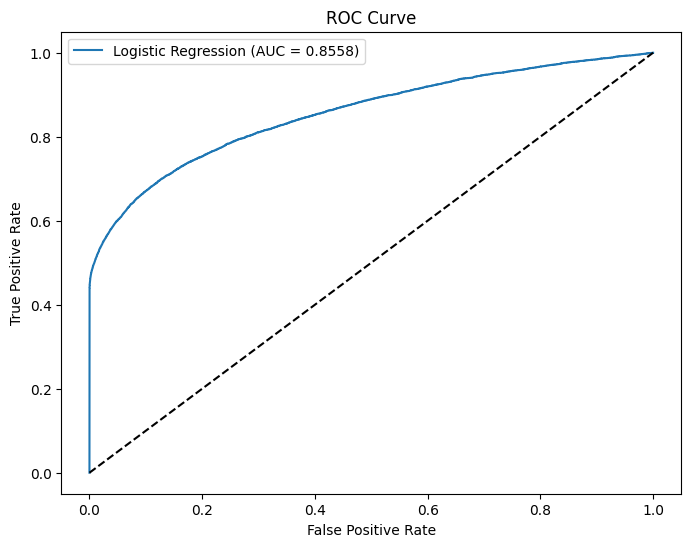

In [261]:
# Visualisasi AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (AUC = %0.4f)' % auc_logreg)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Semakin tinggi AUC, semakin baik performa model dalam membedakan antara perusahaan berisiko tinggi dan rendah. Nilai AUC 0.8558 menunjukkan bahwa model Logistic Regression mampu memprediksi risiko pembayaran kredit perusahaan dengan baik. Kurva ROC yang semakin dekat ke sudut kiri atas menunjukkan performa model yang semakin baik. Berdasarkan grafik ROC, model Logistic Regression dengan AUC 0.8558 menunjukkan performa yang baik dalam memprediksi risiko pembayaran kredit perusahaan. Hal ini berarti model dapat membantu perusahaan dalam mengambil keputusan kredit yang lebih akurat dan meminimalkan risiko gagal bayar.

### **KS**

In [262]:
# Perhitungan KS
df_actual_predicted_log_reg = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred_proba_logreg, columns=['y_pred_proba_log_reg'])], axis=1)
df_actual_predicted_log_reg = df_actual_predicted_log_reg.sort_values('y_pred_proba_log_reg').reset_index(drop=True)

df_actual_predicted_log_reg['Cumulative N Population'] = df_actual_predicted_log_reg.index + 1
df_actual_predicted_log_reg['Cumulative N Bad'] = df_actual_predicted_log_reg['bad_flag'].cumsum()
df_actual_predicted_log_reg['Cumulative N Good'] = df_actual_predicted_log_reg['Cumulative N Population'] - df_actual_predicted_log_reg['Cumulative N Bad']
df_actual_predicted_log_reg['Cumulative Perc Population'] = df_actual_predicted_log_reg['Cumulative N Population'] / df_actual_predicted_log_reg.shape[0]
df_actual_predicted_log_reg['Cumulative Perc Bad'] = df_actual_predicted_log_reg['Cumulative N Bad'] / df_actual_predicted_log_reg['bad_flag'].sum()
df_actual_predicted_log_reg['Cumulative Perc Good'] = df_actual_predicted_log_reg['Cumulative N Good'] / (df_actual_predicted_log_reg.shape[0] - df_actual_predicted_log_reg['bad_flag'].sum())

KS_log_reg = max(df_actual_predicted_log_reg['Cumulative Perc Good'] - df_actual_predicted_log_reg['Cumulative Perc Bad'])

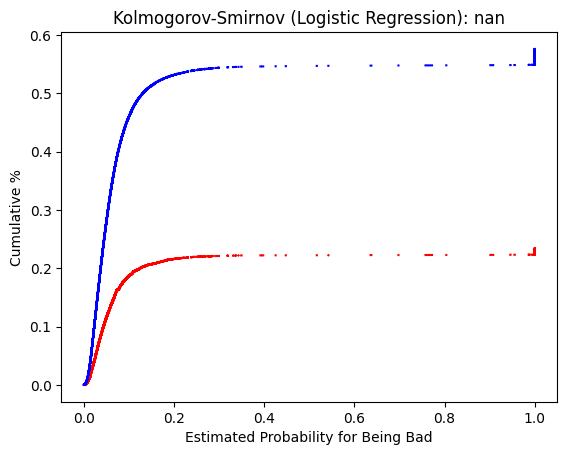

In [263]:
# Plot KS Plot
plt.plot(df_actual_predicted_log_reg['y_pred_proba_log_reg'], df_actual_predicted_log_reg['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_log_reg['y_pred_proba_log_reg'], df_actual_predicted_log_reg['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov (Logistic Regression): %0.4f' % KS_log_reg)
plt.show()

### **Training Naive bayes**

In [251]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [252]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_proba_nb = nb.predict_proba(X_test)[:,1]

### **AUC**

In [253]:
# AUC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

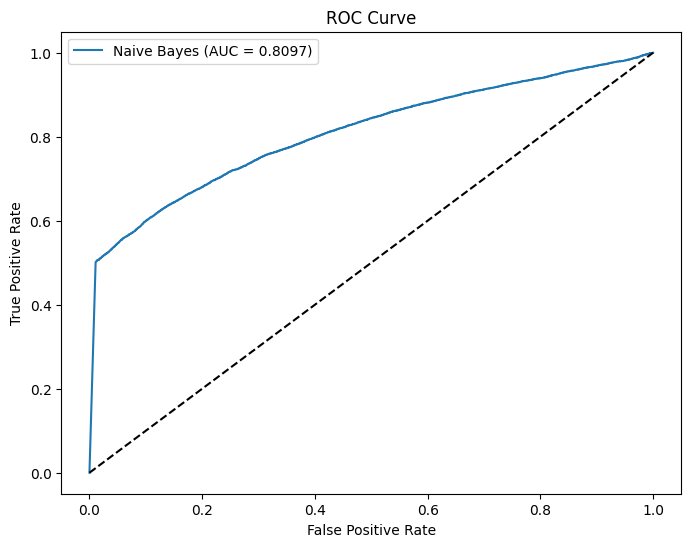

In [254]:
# Visualisasi AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (AUC = %0.4f)' % auc_nb)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Semakin tinggi AUC, semakin baik performa model dalam membedakan antara perusahaan berisiko tinggi dan rendah. Nilai AUC 0.8097 menunjukkan bahwa model Naive Bayes cukup mampu memprediksi risiko pembayaran kredit perusahaan. Kurva ROC yang semakin dekat ke sudut kiri atas menunjukkan performa model yang semakin baik. Berdasarkan grafik ROC, model Naive Bayes dengan AUC 0.8097 menunjukkan performa yang cukup baik dalam memprediksi risiko pembayaran kredit perusahaan.

### **KS**

In [264]:
# Perhitungan KS
df_actual_predicted_log_nb = pd.concat([pd.DataFrame(y_test), pd.DataFrame(y_pred_proba_nb, columns=['y_pred_proba_log_nb'])], axis=1)
df_actual_predicted_log_nb = df_actual_predicted_log_nb.sort_values('y_pred_proba_log_nb').reset_index(drop=True)

df_actual_predicted_log_nb['Cumulative N Population'] = df_actual_predicted_log_nb.index + 1
df_actual_predicted_log_nb['Cumulative N Bad'] = df_actual_predicted_log_nb['bad_flag'].cumsum()
df_actual_predicted_log_nb['Cumulative N Good'] = df_actual_predicted_log_nb['Cumulative N Population'] - df_actual_predicted_log_nb['Cumulative N Bad']
df_actual_predicted_log_nb['Cumulative Perc Population'] = df_actual_predicted_log_nb['Cumulative N Population'] / df_actual_predicted_log_nb.shape[0]
df_actual_predicted_log_nb['Cumulative Perc Bad'] = df_actual_predicted_log_nb['Cumulative N Bad'] / df_actual_predicted_log_nb['bad_flag'].sum()
df_actual_predicted_log_nb['Cumulative Perc Good'] = df_actual_predicted_log_nb['Cumulative N Good'] / (df_actual_predicted_log_nb.shape[0] - df_actual_predicted_log_nb['bad_flag'].sum())

KS_log_nb = max(df_actual_predicted_log_nb['Cumulative Perc Good'] - df_actual_predicted_log_nb['Cumulative Perc Bad'])

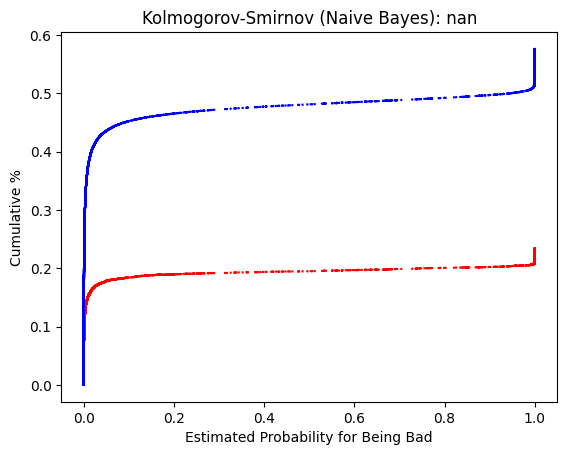

In [265]:
# Plot KS Plot
plt.plot(df_actual_predicted_log_nb['y_pred_proba_log_nb'], df_actual_predicted_log_nb['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted_log_nb['y_pred_proba_log_nb'], df_actual_predicted_log_nb['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov (Naive Bayes): %0.4f' % KS_log_nb)
plt.show()

Pada dunia credit risk modeling, umumnya *AUC* di atas 0.7 dan *KS* di atas 0.3 sudah termasuk performa yang baik.

## **Recommendation**

Berdasarkan hasil tersebut, perusahaan direkomendasikan untuk menggunakan model Random Forest untuk membantu dalam proses pengambilan keputusan kredit. Model ini dapat membantu perusahaan dalam:
1. Mengidentifikasi perusahaan yang berisiko tinggi gagal bayar kredit.
2. Meminimalkan risiko gagal bayar kredit.
3. Meningkatkan profitabilitas perusahaan.

Selain itu, perusahaan juga dapat menerapkan beberapa langkah berikut untuk mengurangi risiko tingkat pembayaran kredit yang kurang baik:
1. Melakukan analisis kredit yang lebih mendalam terhadap calon debitur.
2. Menerapkan persyaratan kredit yang lebih ketat.
3. Menawarkan program edukasi dan pelatihan kepada debitur untuk meningkatkan kesadaran tentang pentingnya pembayaran kredit tepat waktu.
4. Memanfaatkan teknologi untuk memantau dan mengelola risiko kredit.